## Unsupervised Learning: Insurance Customer Segmentation through Cluster Analysis for Marketing and Pricing Decisions
**Contributor:** Jason Khoo

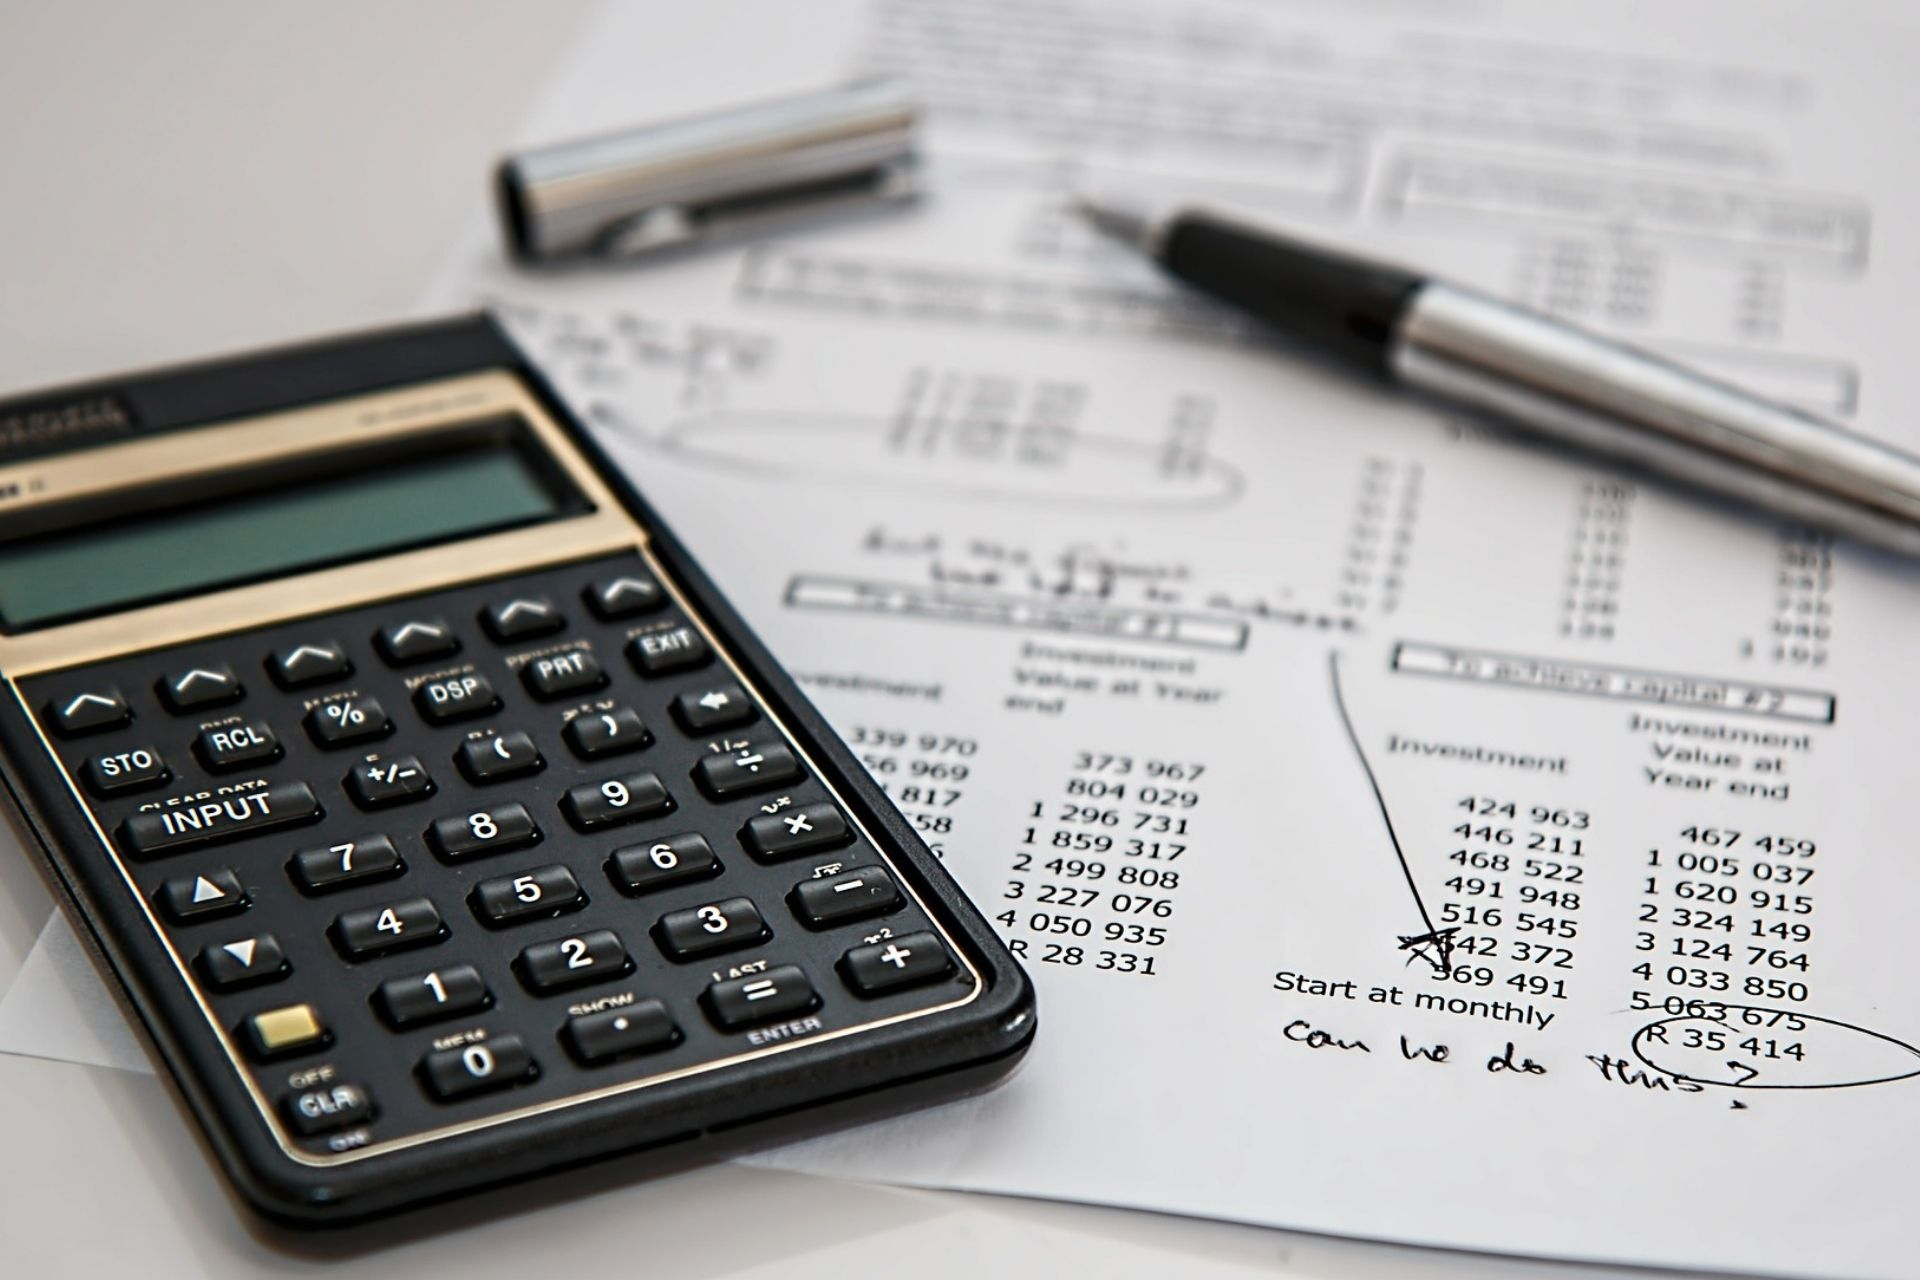

## Introduction 

The business model of insurance companies revolves around the assumption and diversification of risk. One key revenue generating activity of insurance companies is the charging of premiums in exchange for insurance coverage. Through its underwriting process, insurance companies have amassed a large amount of data on their policyholders, including demographics, health and property data. 

Advanced data analytics, such as clustering techniques, have provided the industry the opportunity to tap into the potential of the accumulated data to discover new methods to strengthen premium pricing strategies, conduct targeted marketing campaigns and formulate distribution strategy. 

## Problem Statement 
In this assignment, I will attempt to **perform a cluster analysis using K-means and K-medoids algorithms to achieve customer segmentation** based on the health insurance policyholders data for future business decisions.

## Dataset
- Health Insurance Premium Data, containing 1,338 insurance policyholders data. </br>
(Source: https://www.kaggle.com/simranjain17/insurance )

## Executive Summary

[A. Set Up](#set_up)

[B. Data Wrangling](#wrangling)

[C. Feature Selection](#FS)

[D. Feature Scaling and Principal Component Analysis (PCA)](#PCA)

[E. K-means Clustering Implementation](#kmean)

[F. K-medoids Clustering Implementation](#kmed)

[G. Conclusion](#con)

## A. Set Up <a id = "set_up"></a> 

### i. Import python packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### ii. Dataset loading

In [2]:
# load dataset
df = pd.read_csv('dataset/insurance.csv')

# view head
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

### iii. Display Columns

In [3]:
#display columns
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


### iv. Predictors (Inputs) Selection

In this section, I will consider the following as relevant independent variables for my clustering models: 
- Age (numerical);
- Sex (categorical);
- BMI (numerical);
- Children (numerical);
- Smoker (categorical); and
- Region (categorical);

Charges (numerical) will not be used in my clustering model, however, it will be used as a guidance in my insurance premium pricing decision later on. 

In [4]:
# creating a copy for my original df with the 'charges' to be used later on
df_original = df

# drop 'charges' column
df = df.drop(columns=['charges'])

# view head
print(df.head())

# view shape
print(df.shape)

   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest
(1338, 6)


## B. Data Wrangling <a id = "wrangling"></a> 

### i. Recoding of Categorical Data
- One Hot Encoding will be used to encode the categorical variables (sex, smoker and region) into numerical form.

In [5]:
# #encode the categorical variables 
df2 = pd.get_dummies(df)
df2

age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0      19  27.900         0           1         0          0           1   
1      18  33.770         1           0         1          1           0   
2      28  33.000         3           0         1          1           0   
3      33  22.705         0           0         1          1           0   
4      32  28.880         0           0         1          1           0   
...   ...     ...       ...         ...       ...        ...         ...   
1333   50  30.970         3           0         1          1           0   
1334   18  31.920         0           1         0          1           0   
1335   18  36.850         0           1         0          1           0   
1336   21  25.800         0           1         0          1           0   
1337   61  29.070         0           1         0          0           1   

      region_northeast  region_northwest  region_southeast  region_southwest  
0                    0                 0                 0                 1  
1                    0                 0                 1                 0  
2                    0                 0                 1                 0  
3                    0                 1                 0                 0  
4                    0                 1                 0                 0  
...                ...               ...               ...               ...  
1333                 0                 1                 0                 0  
1334                 1                 0                 0                 0  
1335                 0                 0                 1                 0  
1336                 0                 0                 0                 1  
1337                 0                 1                 0                 0  

[1338 rows x 11 columns]

## C. Feature Selection<a id = "FS"></a> 

### Exploratory Data Analysis and Visualisation 

### i. Feature Selection using Correlation Matrix

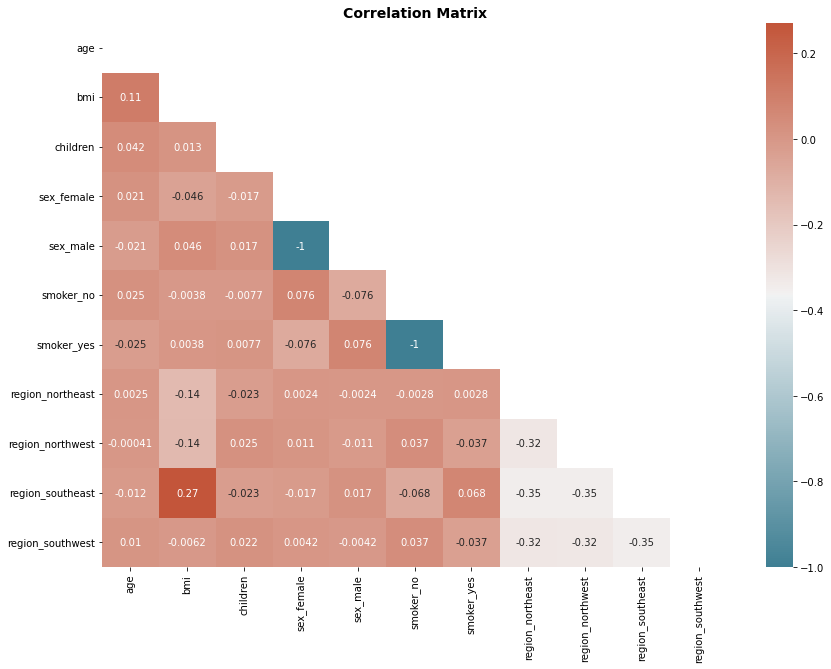

In [6]:
corr = df2.corr()
top_corr_cols = corr["age"].sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True

#set the figure size for the plot
plt.figure(figsize=(14,10)) 

#Seaborn Heatmap for Correlation
sns.heatmap(corr,cmap=sns.diverging_palette(220, 20, as_cmap=True),annot=True,fmt='.2g',
            mask=dropSelf).set_title('Correlation Matrix',fontweight="bold",fontsize=14)

# show the graph
plt.show()

- From the above correlation matrix, we want to consider if there is any strong multicollinearity in the independent variables that will be put through the model. 
- Based on the above matrix, it does not appear to have any variables that have strong correlation relationship with each other. 

### ii. General Exploration

- I shall conduct a general exploratory analysis on the independent variables. 

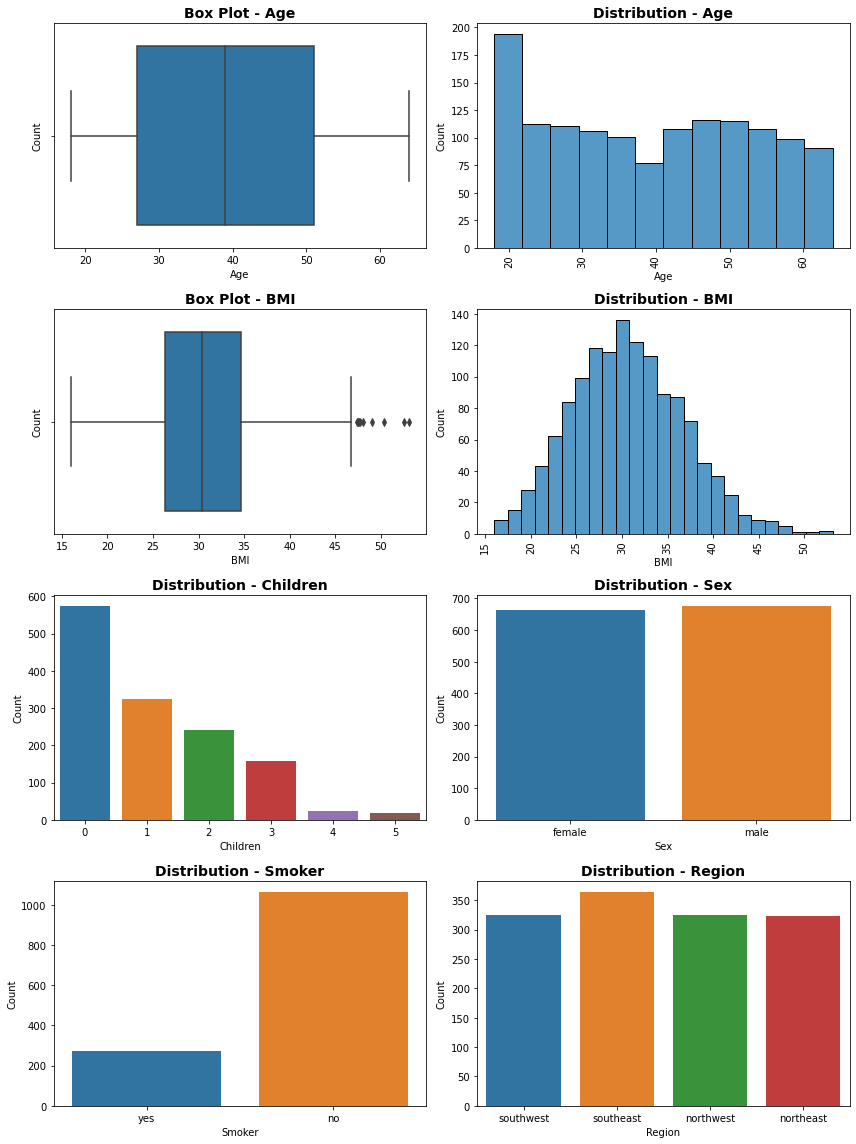

In [7]:
#set the figure size for the plot
plt.figure(figsize=(12,16))

#Subplot for Age
plt.subplot(4,2,1)
sns.boxplot(x='age',data=df2)
#x-axis, y-axis and title adjustment and labelling
plt.xticks(rotation=0)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Box Plot - Age',fontweight="bold",fontsize=14)

#Subplot for Age
plt.subplot(4,2,2)
sns.histplot(x='age',data=df2)
#x-axis, y-axis and title adjustment and labelling
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution - Age',fontweight="bold",fontsize=14)

#Subplot for BMI
plt.subplot(4,2,3)
sns.boxplot(x='bmi',data=df2)
#x-axis, y-axis and title adjustment and labelling
plt.xticks(rotation=0)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Box Plot - BMI',fontweight="bold",fontsize=14)

#Subplot for BMI
plt.subplot(4,2,4)
sns.histplot(x='bmi',data=df2)
#x-axis, y-axis and title adjustment and labelling
plt.xticks(rotation=90)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution - BMI',fontweight="bold",fontsize=14)

#Subplot for Children
plt.subplot(4,2,5)
sns.countplot(x='children',data=df2)
#x-axis, y-axis and title adjustment and labelling
plt.xticks(rotation=0)
plt.xlabel('Children')
plt.ylabel('Count')
plt.title('Distribution - Children',fontweight="bold",fontsize=14)

#Subplot for Sex
plt.subplot(4,2,6)
sns.countplot(x='sex',data=df)
#x-axis, y-axis and title adjustment and labelling
plt.xticks(rotation=0)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution - Sex',fontweight="bold",fontsize=14)

#Subplot for Smoker
plt.subplot(4,2,7)
sns.countplot(x='smoker',data=df)
#x-axis, y-axis and title adjustment and labelling
plt.xticks(rotation=0)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Distribution - Smoker',fontweight="bold",fontsize=14)

#Subplot for Region
plt.subplot(4,2,8)
sns.countplot(x='region',data=df)
#x-axis, y-axis and title adjustment and labelling
plt.xticks(rotation=0)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution - Region',fontweight="bold",fontsize=14)

#Auto adjust padding between subplots
plt.tight_layout()

plt.show()

**Age:**
- Based on the box plot, 50% of the data lies between 27 and 52, with a median of 38.
- The age of the policyholders are relatively well distributed, however, there is a high concentration count at the early 20s.

**BMI:**
- Based on the box plot, 50% of the data lies between 25 and 35, with a median of 30, there are also a few outliers above 45.
- The distribution seem to be following a normal distribution.

**Children:**
- Most policyholders have no children and there is a decreasing trend in policyholder count as children count increases (i.e. fewer policyholders have a large number of children).

**Sex:**
- The distribution between male and female is evenly distributed.

**Smoker:** 
- There are more non-smokers (~ 3 times) as compared to smokers.

**Region:**
- The policyholders count is well represented in all different four regions.

**Conclusion:**
- In terms of feature selection, I'll keep all the above variables for the model.

## D. Feature Scaling and Principal Component Analysis (PCA) <a id = "PCA"></a> 

### i. Feature Scaling via Standardisation

- Differences in the value ranges of initial features may present issues in some machine learning models.
- In PCA, standardisation can prevent features with high variances from getting more weights than those with low variances, ensuring same weightage is given to all features.
- As clustering models use distance-based algorithms, features with large ranges may have a bigger influence on the clustering results. Thus, standardisation helps in the mitigation of the above described phenomenon.

In [8]:
from sklearn.preprocessing import StandardScaler

# standardise the non-binarised columns
scaling_columns = ['age','bmi','children']

scaler = StandardScaler()

df2[scaling_columns]=scaler.fit_transform(df2[scaling_columns])
df2

age       bmi  children  sex_female  sex_male  smoker_no  \
0    -1.438764 -0.453320 -0.908614           1         0          0   
1    -1.509965  0.509621 -0.078767           0         1          1   
2    -0.797954  0.383307  1.580926           0         1          1   
3    -0.441948 -1.305531 -0.908614           0         1          1   
4    -0.513149 -0.292556 -0.908614           0         1          1   
...        ...       ...       ...         ...       ...        ...   
1333  0.768473  0.050297  1.580926           0         1          1   
1334 -1.509965  0.206139 -0.908614           1         0          1   
1335 -1.509965  1.014878 -0.908614           1         0          1   
1336 -1.296362 -0.797813 -0.908614           1         0          1   
1337  1.551686 -0.261388 -0.908614           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0              1                 0                 0                 0   
1              0                 0                 0                 1   
2              0                 0                 0                 1   
3              0                 0                 1                 0   
4              0                 0                 1                 0   
...          ...               ...               ...               ...   
1333           0                 0                 1                 0   
1334           0                 1                 0                 0   
1335           0                 0                 0                 1   
1336           0                 0                 0                 0   
1337           1                 0                 1                 0   

      region_southwest  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
1333                 0  
1334                 0  
1335                 0  
1336                 1  
1337                 0  

[1338 rows x 11 columns]

- After the standardisation, we can see that the values in 'age', 'bmi' and 'children' have a smaller range. 

### ii. PCA Implementation

- In view that my dataframe has 11 columns at the moment, it would be difficult to visualise the identified clusters as compared to visualisation on a 2-dimensional or 3-dimensional graph plot. 
- Thus, I've made use of PCA to reduce the number of dimensions for easy visualisation of my clusters. 
- The resulting reduced dimensions data is also used in the cluster modelling. 

In [9]:
from sklearn.decomposition import PCA

# PCA - finding the number of optimal dimensions
pca_a = PCA()
pca_a_results = pca_a.fit(df2)

# the attribute shows how much variance is explained by each of the 11 individual components
pca_a_results.explained_variance_ratio_

array([2.47523432e-01, 2.17900342e-01, 1.97590472e-01, 1.09629171e-01,
       7.10633755e-02, 5.35751659e-02, 5.27028019e-02, 5.00152390e-02,
       8.85281223e-33, 5.44111904e-33, 1.00831037e-33])

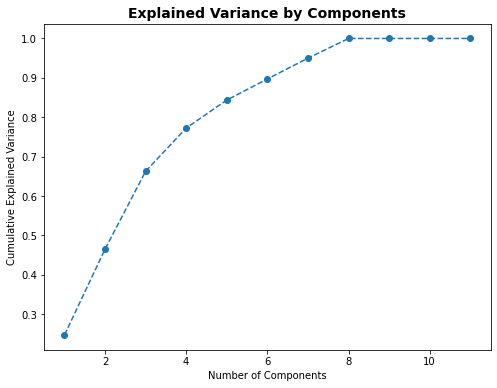

In [10]:
#set the figure size for the plot
plt.figure(figsize=(8,6))

plt.plot(range(1,12), pca_a_results.explained_variance_ratio_.cumsum(), 
         marker = 'o', linestyle ='--' )
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components',fontweight="bold",fontsize=14)
plt.show()

- The implementation of PCA will cause loss of information.
- Thus, the cumulative variance is calculated to assess how much of the original information is being retained after the dimension reduction. 
- The above shows the amount of variance captured depending on the number of principal components used. 

In [11]:
# attempt PCA to reduce dimensions (i.e. the multiple columns) 
pca_b = PCA(n_components=4)
pca_b_result = pca_b.fit_transform(df2)

print('Cumulative variance explained by 4 principal components: {:.2%}'.format(
        np.sum(pca_b.explained_variance_ratio_)))

Cumulative variance explained by 4 principal components: 77.26%


- Given that 4 principal components is able to produce close to cumulative explained variance of 80%, I shall reduce my dimensions from 11 to 4 for clustering. 

## E. K-means Clustering Implementation <a id = "kmean"></a>

### i. Identifying the number of clusters to use

> #### Elbow Plot

In [12]:
from sklearn.cluster import KMeans

# x will be used for k-means
x= df2
# x2 will be used for k-medoids
x2 = df2

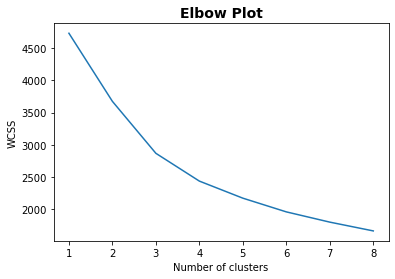

In [13]:
# elbow plot
wcss=[]
for i in range(1,9):
    kmeans = KMeans(i)
    kmeans.fit(pca_b_result)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,9)

plt.plot(number_clusters,wcss)
plt.title('Elbow Plot',fontweight="bold",fontsize=14)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- The elbow plot method can help us in finding the optimal k value (i.e. number of clusters) for clustering models. 
- Through the elbow plot method, I varied the number of clusters (k) from 1 to 8 and calculated the WCSS (Within Clusters Sum of Square - refers to the sum of squared distance between each point and the centroid in a cluster) for each value of k. 
- We want to find the point in where the gradient of the graph changed drastically such that the graph will be almost parallel to the x-axis. 
- From the above, it appears to difficult to visualise at which k value the above drastic change is exhibited.
- Thus, an alternative method is performed below.

> #### Silhouette Score Method

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_b_result)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg
    )

For n_clusters = 2 The average silhouette_score is : 0.1649691107836192
For n_clusters = 3 The average silhouette_score is : 0.18401610484455266
For n_clusters = 4 The average silhouette_score is : 0.16865784538396233
For n_clusters = 5 The average silhouette_score is : 0.14727491041994967
For n_clusters = 6 The average silhouette_score is : 0.14361725279439208
For n_clusters = 7 The average silhouette_score is : 0.13950430538900674
For n_clusters = 8 The average silhouette_score is : 0.13808711804834287


- An alternative method to identify the optimal number of clusters is via the Silhouette Score Method.
- The silhouette score gives us a perspective into the density and separation of the formed clusters. 
- A silhouette score can range from -1 to 1; a score of 1 means that the clusters are nicely separated, while a score of less than -1 means that data might be assigned to the wrong clusters
- From the calculation above, it seems that '3' clusters is optimal given that it has the highest average silhouette score. 

(Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
)

### ii. Clustering Implementation

In [15]:
# apply kmeans fitting into 3 clusters
kmeans = KMeans(3)
kmeans.fit(pca_b_result)

# predict cluster index for each sample
identified_clusters=kmeans.fit_predict(pca_b_result)

# get centroids
centroids = kmeans.cluster_centers_

In [16]:
# combine original dataframe with the PCA figures and assigned clusters

# add PCA figures
df_kmeans = pd.concat([x.reset_index(drop=True), pd.DataFrame(pca_b_result)],axis=1)
df_kmeans.columns.values[-4: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']

# add clusters number
df_kmeans['Clusters'] = kmeans.labels_

df_kmeans

age       bmi  children  sex_female  sex_male  smoker_no  \
0    -1.438764 -0.453320 -0.908614           1         0          0   
1    -1.509965  0.509621 -0.078767           0         1          1   
2    -0.797954  0.383307  1.580926           0         1          1   
3    -0.441948 -1.305531 -0.908614           0         1          1   
4    -0.513149 -0.292556 -0.908614           0         1          1   
...        ...       ...       ...         ...       ...        ...   
1333  0.768473  0.050297  1.580926           0         1          1   
1334 -1.509965  0.206139 -0.908614           1         0          1   
1335 -1.509965  1.014878 -0.908614           1         0          1   
1336 -1.296362 -0.797813 -0.908614           1         0          1   
1337  1.551686 -0.261388 -0.908614           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0              1                 0                 0                 0   
1              0                 0                 0                 1   
2              0                 0                 0                 1   
3              0                 0                 1                 0   
4              0                 0                 1                 0   
...          ...               ...               ...               ...   
1333           0                 0                 1                 0   
1334           0                 1                 0                 0   
1335           0                 0                 0                 1   
1336           0                 0                 0                 0   
1337           1                 0                 1                 0   

      region_southwest  Component 1  Component 2  Component 3  Component 4  \
0                    1    -1.529696    -0.678871     0.550813    -0.541033   
1                    0    -0.549638    -0.355392     1.575735     0.521223   
2                    0     0.281843     1.239861     1.389229     0.522318   
3                    0    -1.470830    -0.330953    -0.662698     0.733803   
4                    0    -0.813172    -0.701682    -0.017322     0.655246   
...                ...          ...          ...          ...          ...   
1333                 0     0.944094     1.500215    -0.146853     0.628745   
1334                 0    -1.163312    -0.919422     0.892065    -0.802717   
1335                 0    -0.462690    -1.304769     1.536327    -0.881205   
1336                 1    -1.668973    -0.553536     0.197844    -0.743123   
1337                 0     0.516285    -0.674799    -1.631591    -0.391839   

      Clusters  
0            1  
1            1  
2            2  
3            1  
4            1  
...        ...  
1333         2  
1334         1  
1335         1  
1336         1  
1337         0  

[1338 rows x 16 columns]

> #### Visualisation using PCA axes

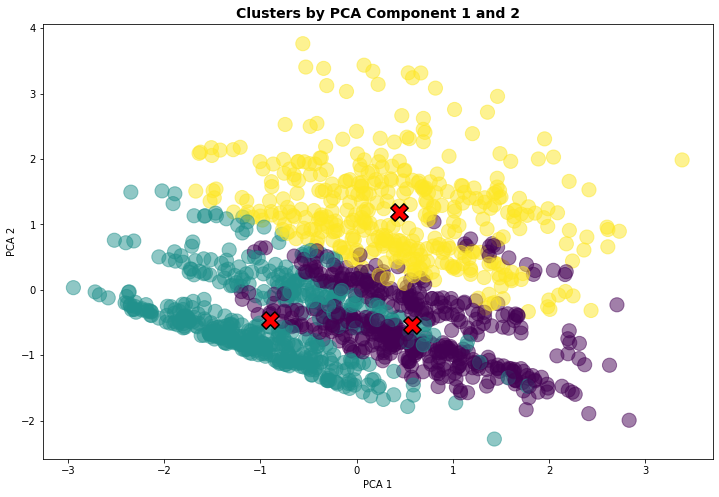

In [17]:
x_ax = df_kmeans['Component 1']
y_ax = df_kmeans['Component 2']

#set the figure size for the plot
plt.figure(figsize=(12,8))

plt.scatter(x_ax, y_ax, c=df_kmeans['Clusters'], 
            alpha=0.5, s= 200)  # plot different colors per cluster
plt.title('Clusters by PCA Component 1 and 2',fontweight="bold",fontsize=14)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.scatter(centroids[:, 0], centroids[:, 1], 
             marker='X', s=300, linewidths=3.5,
             color='red', edgecolors="black", lw=1.5)

plt.show()

- As seen above, the k-means clustering algorithm has split our data into 3 separate clusters identified by the different hue.
- The 'X' marks represent the centroids of each cluster.

> #### Visualisation using original data axes

- Since it can be difficult to inteprete the characteristics of each clusters using the PCA values, I've attempted to plot the graphs using the original data.

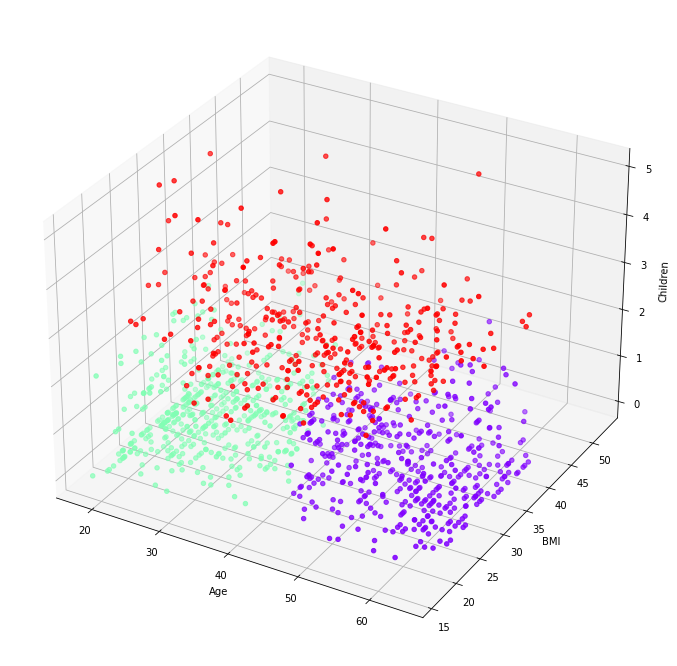

In [18]:
# merge the data_with_clusters with the original df for plotting
df_plot = pd.merge(df_kmeans, df_original, left_index=True, right_index=True)

# visualisation using only 3 variables
plt.figure(figsize=(16,12))
ax = plt.axes(projection='3d')

ax.scatter3D(df_plot['age_y'], df_plot['bmi_y'], df_plot['children_y'], 
             c=df_plot['Clusters'],cmap='rainbow')

ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Children')

plt.show()

In [19]:
# interactive visualisation via plotly
import plotly.express as px
# Set notebook mode to work in offline to allow plotty to show up when notebook is opened
import plotly.offline as pyo
pyo.init_notebook_mode()

fig = px.scatter_3d(df_plot, x='age_y', y='bmi_y', z='children_y',
              color='Clusters')
fig.update_traces(marker={'size': 5})
fig.show()

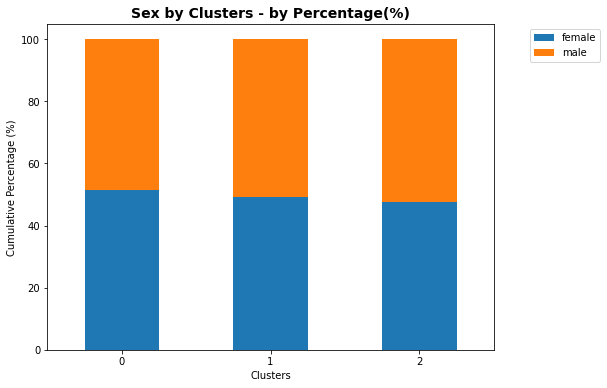

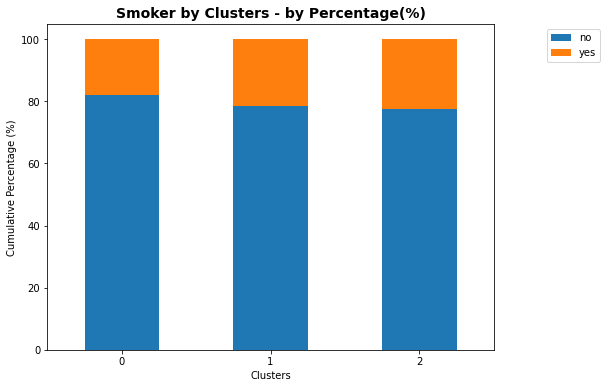

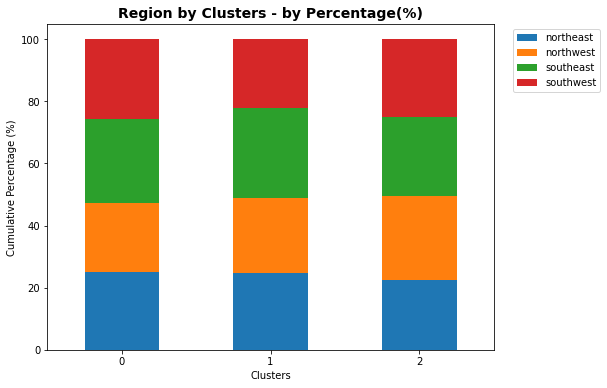

In [20]:
# sex, smoker, region

#Plot the percentage stacked bar chart for sex
sex_grouped = df_plot.groupby(['Clusters','sex'])['Clusters'].count().unstack('sex')
sex_grouped2 = sex_grouped.div(sex_grouped.sum(axis=1),axis=0)*100
sex_grouped2.plot(kind='bar',stacked=True,figsize=(8,6))
#x-axis, y-axis and title adjustment and labelling
plt.legend(bbox_to_anchor=(1.25,1))
plt.ylabel('Cumulative Percentage (%)')
plt.xlabel('Clusters')
plt.xticks(rotation=0)
plt.title('Sex by Clusters - by Percentage(%)',fontweight="bold",fontsize=14)

#Plot the percentage stacked bar chart for smoker
smoker_grouped = df_plot.groupby(['Clusters','smoker'])['Clusters'].count().unstack('smoker')
smoker_grouped2 = smoker_grouped.div(smoker_grouped.sum(axis=1),axis=0)*100
smoker_grouped2.plot(kind='bar',stacked=True,figsize=(8,6))
#x-axis, y-axis and title adjustment and labelling
plt.legend(bbox_to_anchor=(1.25,1))
plt.ylabel('Cumulative Percentage (%)')
plt.xlabel('Clusters')
plt.xticks(rotation=0)
plt.title('Smoker by Clusters - by Percentage(%)',fontweight="bold",fontsize=14)

#Plot the percentage stacked bar chart for region
region_grouped = df_plot.groupby(['Clusters','region'])['Clusters'].count().unstack('region')
region_grouped2 = region_grouped.div(region_grouped.sum(axis=1),axis=0)*100
region_grouped2.plot(kind='bar',stacked=True,figsize=(8,6))
#x-axis, y-axis and title adjustment and labelling
plt.legend(bbox_to_anchor=(1.25,1))
plt.ylabel('Cumulative Percentage (%)')
plt.xlabel('Clusters')
plt.xticks(rotation=0)
plt.title('Region by Clusters - by Percentage(%)',fontweight="bold",fontsize=14)

# show the graph
plt.show()


- Based on the plot above, it appears that the distinct clusters identified have the following characteristics:

**1. Cluster 1 (Clusters = 2, yellow data points)**
- Policyholders with big families, with at least 2 children
- No distinct age group and BMI

**2. Cluster 2 (Clusters = 0, blue data points)**
- Policyholders with small families, with 2 or less children
- Policyholders are from an older age group (aged 40 or above)
- No distinct BMI range

**3. Cluster 3 (Clusters = 1, pink data points)**
- Policyholders with small families, with 2 or less children
- Policyholders are from a younger age group (aged 40 or below)
- No distinct BMI range

In terms of the sex, smoker and region variables, it doesn't seem to have any much impact on the clusters since all clusters have similar percentages in the attributes within the 3 variables. 

## F. K-medoids Clustering Implementation <a id = "kmed"></a>

### i. Clustering Implementation

- I would like to perform an alternative clustering algorithm, K-medoids, to act as a comparison for the above K-means clustering. 
- I will follow the number of clusters (i.e. 3) identified in K-means.

(Reference: https://scikit-learn-extra.readthedocs.io/en/stable/auto_examples/plot_kmedoids.html#sphx-glr-auto-examples-plot-kmedoids-py)

In [21]:
from sklearn_extra.cluster import KMedoids
# conda install -c conda-forge scikit-learn-extra

# Compute Kmedoids clustering
kmedoids = KMedoids(n_clusters=3).fit(pca_b_result)
y_kmed = kmedoids.fit_predict(pca_b_result)

# get centroids for kmedoids
centroids_kmed = kmedoids.cluster_centers_

In [22]:
# combine original dataframe with the PCA figures and assigned clusters

# add PCA figures
df_kmed = pd.concat([x2.reset_index(drop=True), pd.DataFrame(pca_b_result)],axis=1)
df_kmed.columns.values[-4: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']

# add clusters number
df_kmed['Clusters'] = kmedoids.labels_

df_kmed

age       bmi  children  sex_female  sex_male  smoker_no  \
0    -1.438764 -0.453320 -0.908614           1         0          0   
1    -1.509965  0.509621 -0.078767           0         1          1   
2    -0.797954  0.383307  1.580926           0         1          1   
3    -0.441948 -1.305531 -0.908614           0         1          1   
4    -0.513149 -0.292556 -0.908614           0         1          1   
...        ...       ...       ...         ...       ...        ...   
1333  0.768473  0.050297  1.580926           0         1          1   
1334 -1.509965  0.206139 -0.908614           1         0          1   
1335 -1.509965  1.014878 -0.908614           1         0          1   
1336 -1.296362 -0.797813 -0.908614           1         0          1   
1337  1.551686 -0.261388 -0.908614           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0              1                 0                 0                 0   
1              0                 0                 0                 1   
2              0                 0                 0                 1   
3              0                 0                 1                 0   
4              0                 0                 1                 0   
...          ...               ...               ...               ...   
1333           0                 0                 1                 0   
1334           0                 1                 0                 0   
1335           0                 0                 0                 1   
1336           0                 0                 0                 0   
1337           1                 0                 1                 0   

      region_southwest  Component 1  Component 2  Component 3  Component 4  \
0                    1    -1.529696    -0.678871     0.550813    -0.541033   
1                    0    -0.549638    -0.355392     1.575735     0.521223   
2                    0     0.281843     1.239861     1.389229     0.522318   
3                    0    -1.470830    -0.330953    -0.662698     0.733803   
4                    0    -0.813172    -0.701682    -0.017322     0.655246   
...                ...          ...          ...          ...          ...   
1333                 0     0.944094     1.500215    -0.146853     0.628745   
1334                 0    -1.163312    -0.919422     0.892065    -0.802717   
1335                 0    -0.462690    -1.304769     1.536327    -0.881205   
1336                 1    -1.668973    -0.553536     0.197844    -0.743123   
1337                 0     0.516285    -0.674799    -1.631591    -0.391839   

      Clusters  
0            2  
1            1  
2            1  
3            1  
4            1  
...        ...  
1333         1  
1334         2  
1335         2  
1336         2  
1337         0  

[1338 rows x 16 columns]

> #### Visualisation using PCA axes

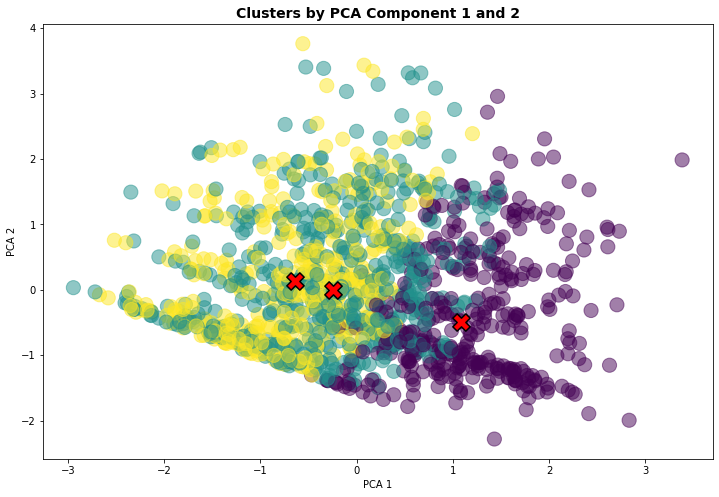

In [23]:
x_ax = df_kmed['Component 1']
y_ax = df_kmed['Component 2']

#set the figure size for the plot
plt.figure(figsize=(12,8))

plt.scatter(x_ax, y_ax, c=df_kmed['Clusters'], 
            alpha=0.5, s= 200)  # plot different colors per cluster
plt.title('Clusters by PCA Component 1 and 2',fontweight="bold",fontsize=14)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.scatter(centroids_kmed[:, 0], centroids_kmed[:, 1], 
             marker='X', s=300, linewidths=3.5,
             color='red', edgecolors="black", lw=1.5)

plt.show()

- As observed above, the use of K-medoids clustering algorithm has produced different cluster groups as compared to the clusters produced by the K-means.

> #### Visualisation using original data axes

- Similar to the above, I shall examine the characteristics of the clusters using the original data.

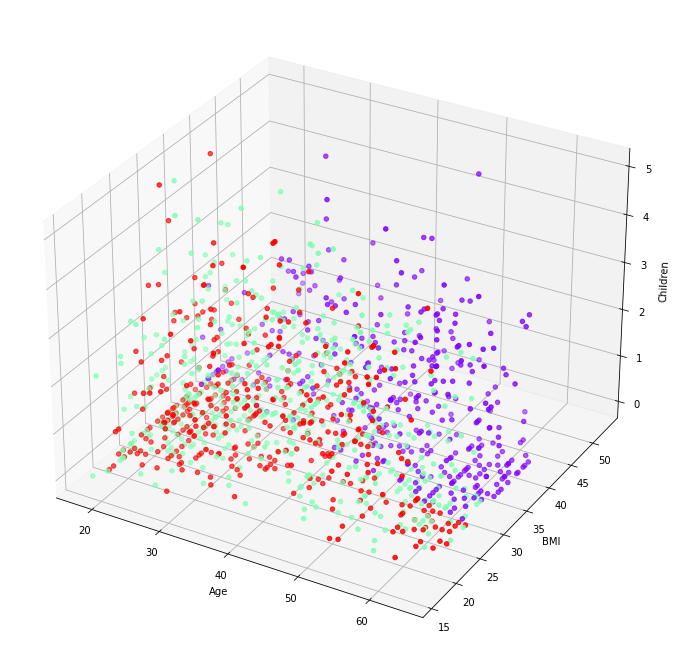

In [24]:
# merge the data_with_clusters with the original df for plotting
df_plot2 = pd.merge(df_kmed, df_original, left_index=True, right_index=True)

# visualisation using only 3 variables
plt.figure(figsize=(16,12))
ax = plt.axes(projection='3d')

ax.scatter3D(df_plot2['age_y'], df_plot2['bmi_y'], df_plot2['children_y'], 
             c=df_plot2['Clusters'],cmap='rainbow')

ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Children');

plt.show()

In [25]:
# interactive visualisation via plotly
fig = px.scatter_3d(df_plot2, x='age_y', y='bmi_y', z='children_y',
              color='Clusters')
fig.update_traces(marker={'size': 5})
fig.show()

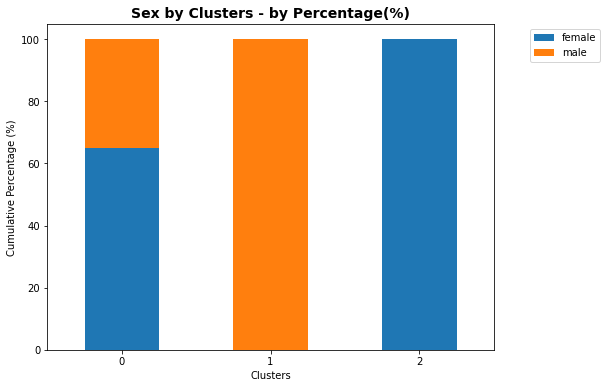

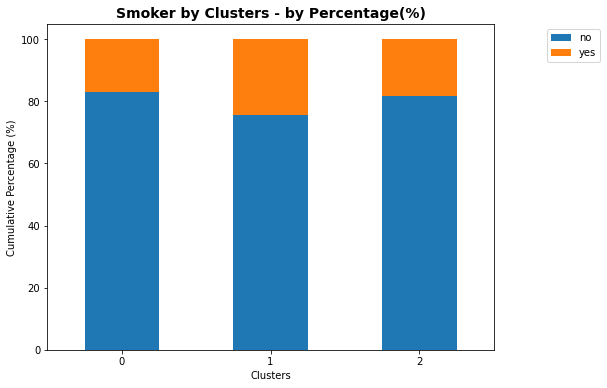

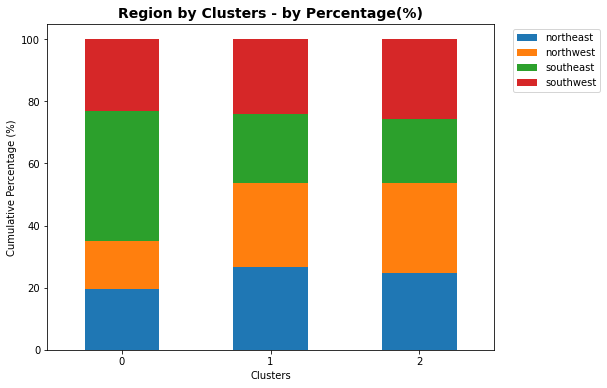

In [26]:
# sex, smoker, region

#Plot the percentage stacked bar chart for sex
sex_grouped = df_plot2.groupby(['Clusters','sex'])['Clusters'].count().unstack('sex')
sex_grouped2 = sex_grouped.div(sex_grouped.sum(axis=1),axis=0)*100
sex_grouped2.plot(kind='bar',stacked=True,figsize=(8,6))
#x-axis, y-axis and title adjustment and labelling
plt.legend(bbox_to_anchor=(1.25,1))
plt.ylabel('Cumulative Percentage (%)')
plt.xlabel('Clusters')
plt.xticks(rotation=0)
plt.title('Sex by Clusters - by Percentage(%)',fontweight="bold",fontsize=14)

#Plot the percentage stacked bar chart for smoker
smoker_grouped = df_plot2.groupby(['Clusters','smoker'])['Clusters'].count().unstack('smoker')
smoker_grouped2 = smoker_grouped.div(smoker_grouped.sum(axis=1),axis=0)*100
smoker_grouped2.plot(kind='bar',stacked=True,figsize=(8,6))
#x-axis, y-axis and title adjustment and labelling
plt.legend(bbox_to_anchor=(1.25,1))
plt.ylabel('Cumulative Percentage (%)')
plt.xlabel('Clusters')
plt.xticks(rotation=0)
plt.title('Smoker by Clusters - by Percentage(%)',fontweight="bold",fontsize=14)

#Plot the percentage stacked bar chart for region
region_grouped = df_plot2.groupby(['Clusters','region'])['Clusters'].count().unstack('region')
region_grouped2 = region_grouped.div(region_grouped.sum(axis=1),axis=0)*100
region_grouped2.plot(kind='bar',stacked=True,figsize=(8,6))
#x-axis, y-axis and title adjustment and labelling
plt.legend(bbox_to_anchor=(1.25,1))
plt.ylabel('Cumulative Percentage (%)')
plt.xlabel('Clusters')
plt.xticks(rotation=0)
plt.title('Region by Clusters - by Percentage(%)',fontweight="bold",fontsize=14)

# show the graph
plt.show()


- Based on the plot above, it appears that the distinct clusters identified have the following characteristics:

**1. Cluster 1 (Clusters = 0, blue data points)**
- Policyholders with high BMI (30 or above)
- Majority south east region

**2. Cluster 2 (Clusters = 1, pink data points)**
- Policyholders with low BMI (30 or below)
- Majority male

**3. Cluster 3 (Clusters = 2, yellow data points)**
- Policyholders with low BMI (30 or below)
- Majority female

In terms of the smoker, children and age variable, it doesn't seem to have any much impact on the clusters since all clusters have similar percentages in the attributes within that variables. 

### ii. Evaluation on the number of clusters used

> #### Elbow Plot

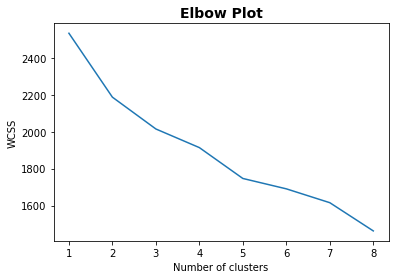

In [27]:
wcss=[]
for i in range(1,9):
    kmed = KMedoids(i)
    kmed.fit(pca_b_result)
    wcss_iter = kmed.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,9)
plt.plot(number_clusters,wcss)
plt.title('Elbow Plot',fontweight="bold",fontsize=14)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- The elbow plot did not appear to provide any conclusive results, as such, we will look at the silhouette score method.

> #### Silhouette Score Method

In [28]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:

    clusterer = KMedoids(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_b_result)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    
    silhouette_avg = silhouette_score(pca_b_result, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg
    )

For n_clusters = 2 The average silhouette_score is : 0.16950202014713467
For n_clusters = 3 The average silhouette_score is : 0.17263436816386474
For n_clusters = 4 The average silhouette_score is : 0.15604278441903222
For n_clusters = 5 The average silhouette_score is : 0.1928644503261501
For n_clusters = 6 The average silhouette_score is : 0.17002225448512973
For n_clusters = 7 The average silhouette_score is : 0.1838331065944048
For n_clusters = 8 The average silhouette_score is : 0.2240722002034476


- Based on the silhouette scores, it appears that if K-medoids clustering algorithm is used, the optimal number of clusters to use is 8 instead of 3 given the highest average silhouette score observed. 

## G. Conclusion  <a id = "con"></a> 

### Conclusion
The clustering results obtained can guide the insurers in making useful business decision based on the insights generated. 

Using the cluster analysis results, the insurer might segment the customers into the relevant clusters and perform targeted marketing campaigns or pricing decisions to increase revenue streams based on the characteristics of the customers exhibited in each separate clusters.

**- K-means clustering**

Here are some of the marketing decisions that could be implemented based on the cluster analysis using K-means:

**Cluster 1:** Some insurance products that can be considered for cross selling include mortality protection and disability insurance cover. This is in consideration that they have large families and any unexpected incidents would still allow the financial needs of their families being met. 

**Cluster 2:** In view of the older aged group of this cluster, the insurer can consider up selling existing health insurance and critical illness plans that will help the older aged group to mitigate cost of medical treatments in old age. 

**Cluster 3:** For younger families that are starting out, their financial priorities lie in family planning, home mortage and saving for their children education. Insurer can consider cross selling home mortage insurance for their new homes. In addition, given their relatively younger age, term life insurance can be marketed to them over whole life insurance since it is more attractive given the cheaper insurance premiums. Critical illness / health insurances plans could be considered as well given that younger aged are less likely to have pre-existing medical conditions. This would certainly increase the insurance sign up rates if such marketing campaigns are targeted in these areas. 

**- K-medoids clustering**

Using the results of K-medoids clustering, I will take a look at the pricing strategies that can be implemented for the different clusters. These strategies are recommended in conjunction with the existing premiums on the different clusters (refer to Appendix A below). 

**Cluster 1:** In view that the policyholders in this group tend to have high BMIs, this could mean that they might be more prone to obesity related diseases and might prompt the insurer to re-evaluate the premiums charged to this group for insurance products such as health and life insurance. 

This has been reflected in the existing premiums seen in Appendix A where the median of 11,446 is higher than that of both Cluster 2 (8,610) and Cluster 3 (7,347). The insurer should consider whether the percentage difference in the premiums is sufficient to cover for the risks relating to insuring the health costs associated with obesity related diseases.

**Cluster 2:** This cluster is made up of majority males. 

**Cluster 3:** This cluster is made up of majority females. 

For Cluster 2 and Cluster 3, the people has a lower and healthier BMI than Cluster 1. In such a case, the insurer could consider to provide them with an insurance premium rebate to retain the existing policyholders and attract insurance sign ups given that the insurer take on a lower risk in insuring this cluster. 

As for the difference in sex (i.e. males and females) in Cluster 2 and Cluster 3, in terms of health insurance, females tend to have higher health care costs in terms of the maternity and longer life expectancy. However, in Appendix A, it was found out that Cluster 2 (males) has a higher median than Cluster 3 (females). The insurer might want to increase the insurance premiums for Cluster 3 to match that of Cluster 2 given the higher likelihood of health insurance payout involved in insuring females. 

**Comparison of K-means and K-medoids clustering**
- Difference in the characteristics of the clusters identified in view of the different algorithm calculation.
- Difference in the number of optimal clusters to be used (3 clusters for K-means and 8 clusters for K-medoids).

### Limitations
- In terms of the dimension reduction using PCA, the above cumulative variance was 77%. There is no standard benchmark as to whether how much percentage should be retained in the resulting principal components.
- There is a difference in the number of optimal clusters to be used for the 2 different clustering methods. A direct comparison in the clusters characteristics as above might not be accurate.
- Cluster analysis is simply a statistical technique which has no underlying knowledge of the market and understanding of consumer behaviors. Clusters identified is based on the built-in clustering algorithm calculations and users might not have control over how the clusters are being built. In addition, analysis of the cluster characteristics might not be easy to inteprete. 

### Future Research
- Users should ensure that the customer information in their database is complete and accurate as this will increase the reliable of the cluster analysis for identification of customer segments. 
- Cluster analysis should not be used solely in making business decisions due to its inherent limitations. The insurer should complement cluster analysis with alternative analytical methods, such as customer behavior analytics, to make informed business decisions. 

### Appendix A - Descriptive Statistics on the Current Premiums (Clustered)

In [29]:
print('K-means clustering:')
print('Cluster 1 (Large families):')
print(df_plot[['charges']].loc[df_plot['Clusters']==0].describe())
print('Cluster 2 (Small families, Older aged):')
print(df_plot[['charges']].loc[df_plot['Clusters']==1].describe())
print('Cluster 3 (Small families, Younger aged):')
print(df_plot[['charges']].loc[df_plot['Clusters']==2].describe())

print('\nK-medoids clustering:')
print('Cluster 1 (High BMI):')
print(df_plot2[['charges']].loc[df_plot2['Clusters']==0].describe())
print('Cluster 2 (Low BMI, Males):')
print(df_plot2[['charges']].loc[df_plot2['Clusters']==1].describe())
print('Cluster 3 (Low BMI, Females):')
print(df_plot2[['charges']].loc[df_plot2['Clusters']==2].describe())

K-means clustering:
Cluster 1 (Large families):
            charges
count    457.000000
mean   16101.322767
std    11670.397769
min     5397.616700
25%     8964.060550
50%    11735.879050
75%    15230.324050
max    63770.428010
Cluster 2 (Small families, Older aged):
            charges
count    487.000000
mean    9473.656746
std    11540.123330
min     1121.873900
25%     2214.299950
50%     3757.844800
75%    14641.817300
max    58571.074480
Cluster 3 (Small families, Younger aged):
            charges
count    394.000000
mean   14679.821449
std    12125.270029
min     3443.064000
25%     6456.357837
50%     9531.801025
75%    18939.047165
max    60021.398970

K-medoids clustering:
Cluster 1 (High BMI):
            charges
count    370.000000
mean   16533.087237
std    13917.453249
min     1146.796600
25%     8034.397837
50%    11446.009075
75%    15954.861900
max    63770.428010
Cluster 2 (Low BMI, Males):
            charges
count    546.000000
mean   13146.317779
std    12401.9955